# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Luis Angel Motta Valero<br>

URL: https://drive.google.com/file/d/1v2xoJ78jemWAIgVSZzc00KGTEIZJSTrq/view?usp=sharing<br>
GitHub: [03MAIR-Algoritmos-de-Optimizacion](https://github.com/AngelMV97/03MAIR-Algoritmos-de-Optimizacion.git)<br>

Problema:

> 1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

2. Organizar los horarios de partidos de La Liga.<br>

**Descripción del problema:** Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de
liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un
algoritmo que realice la asignación de los partidos a los horarios de forma que maximice
la audiencia.

---






                                        

**¿Cuantas posibilidades hay sin tener en cuenta las restricciones?**



**¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.**




*Respuesta*

De acuerdo con el problema, se tiene igual cantidad de partidos y horarios para cada partido, por lo tanto,  existen $n$ horarios por cada $n$ partidos, eso es $n^{n}$ posibilidades sin restricciones; sin embargo, para una misma planeación en los equipos que jugarán cada partido (la cual es dada por el problema y por ello no se considera el número de equipos que conforman las diferentes categorías como una restricción para este cálculo), las únicas restricciones son que pueden presentarse coincidencias en el horario en que jueguen los partidos y obligatoriamente se debe jugar un partido el lunes y uno el viernes, con ello, los posibles horarios y partidos se reducen en 2 luego de ubicar el respectivo partido para el lunes y el correspondiente partido del viernes, y para el restante $n-2$ número de partidos existen $n-2$ horarios disponibles dado que se pueden repetir los horarios.

Adicionalmente, por cada posicion $i = n$ en que se pueda ubicar el vienes (o lunes) dentro de la lista de partidos, hay $j = n-1$ posiciones para el lunes (o viernes); así, serán en total $n(n-1)[(n-2)^{n-2}]$ posibilidades, donde $n$ es el número de horarios disponibles para cada partido, que para el problema planteado es 10, recordando que dichos horarios son los siguientes:

**Lunes:** 20h<br>
**Viernes:** 20h<br>
**Sábado:** 12h - 16h - 18h - 20h<br>
**Domingo:** 12h - 16h - 18h - 20h<br>

---

### Modelo para el espacio de soluciones<br>
**¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)**


*Respuesta*

Inicialmente se tomó el espacio de soluciones como un diccionario cuya clave para cada uno de sus elementos es una lista que contiene el orden específico para los 10 horarios tomados y su respectivo valor es otra lista con la cantidad de audiencia para cada partido acorde a su horario, así, el total de audiencia lograda sería la suma para dicho elemento. Resultó una estructura poco funcional y, mientras resolvía el problema, se necesitó que la lista de horarios y su correspondiente lista de audiencia esstuvieran en formato tipo lista, es decir, separadas y no como clave-valor dentro de un diccionario. Así que dentro del algoritmo resultaban 3 listas:

- Solucion: lista con los 10 horarios tomados para el conjunto de partidos.
- x: lista con la cantidad de audiencia presente para cada horario.
- y: total de audiencia estimada para la solucion encontrada.

---

A partir de la siguiente pregunta se introducirán líneas de código, antes de continuar se importan las librerías necesarias

In [69]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Según el modelo para el espacio de soluciones<br>
**¿Cual es la función objetivo?**

**¿Es un problema de maximización o minimización?**

*Respuesta*

El problema requiere encontrar la combinación de horarios para la lista de partidos dada que permita obtener la mayor audiencia presente posible, por lo tanto, es un problema de maximización.

Como se comentó previamente, se obtienen 3 listas, a partir de las cuales se aplica el método del descenso del gradiente para encontrar la función objetivo  empleando la regresión lineal. La funcón que construye las listas es una modificación del algoritmo que mejora la complejidad del algoritmo por fuerza bruta y recibe por parámetros la lista de categorías del problema, las listas *soluciones*, *x* y *y*, además de una cantidad *n* de iteraciones máximas. La función en cuestión consiste en crear una solución aleatoria, si su audiencia total no está en *y*, entonces dicho valor es agregado a esta lista, así como la solución y las $x_i$ a las listas correspondientes, luego realiza permutaciones con dicha solución y vuelve a verificar si el total con cada permutación está en *y*; el algortimo es ejecutado hasta completar las *n* iteraciones.

Dado que algunos horarios tienen el mismo factor de audiencia (S20 y D20 tienen el mismo factor 1, al igual que V12 y L12 con factor 0.4 para ambos) y se repiten algunas categorías entre los partidos, ciertas soluciones compartirán el mismo total, por ello, las soluciones tomadas serán pocas en comparación con todas las soluciones posibles, para evitar repetir audiencias totales.

La función es la siguiente:

In [2]:
def variables_liga(categorias,x,y,soluciones,n=10000):

    for _ in range(n):
        solucion_inicial = crear_solucion()
        audiencia_inicial, total_inicial = totales_posibles(solucion_inicial,categorias)
        if total_inicial not in y:
            y.append(total_inicial)
            x.append(audiencia_inicial)
            soluciones.append(solucion_inicial)
        for i,e_i in enumerate(solucion_inicial[:-1]):
            intercambios = [e_i]
            indices = []
            for j,e_j in enumerate(solucion_inicial[i+1:]):
                if e_j not in intercambios:
                    intercambios.append(e_j)
                    indices.append(j+i+1)
            for indice in indices:
                solucion_actual = solucion_inicial.copy()
                solucion_actual[i], solucion_actual[indice] = solucion_actual[indice], solucion_actual[i]
                audiencia_actual, total_actual = totales_posibles(solucion_actual,categorias)
                if total_actual not in y:
                    y.append(total_actual)
                    x.append(audiencia_actual)
                    soluciones.append(solucion_actual)

In [4]:
# Se realiza una primera búsqueda de soluciones
categorias = ['B_A','B_A','C_C','B_A','C_C','B_C','B_B','B_B','B_C','B_B']
soluciones, x, y = [], [], []
variables_liga(categorias,x,y,soluciones)

Previamente se realizaron algunas pruebas y se guardaron las 3 listas en archivos con extensión .npy, así que se cargarán de nuevo

In [5]:
soluciones = np.load('test_soluciones.npy')
x = np.load('test_x.npy')
y = np.load('test_y.npy')
soluciones = soluciones.tolist()
x = x.tolist()
y = y.tolist()

In [6]:
len(y)

133679

In [61]:
# Se guarda la longitud de y, vuelve a buscar soluciones válidas y guardar en otra variable la nueva longitud
m = len(y)
variables_liga(categorias,x,y,soluciones)
p = len(y)
# Mientras ambas longitudes sean diferentes (se sigan encontrando soluciones), se ejecuta la función
while m != p:
  m = len(y)
  variables_liga(categorias,x,y,soluciones)
  p = len(y)
print(len(y),len(soluciones),len(x))

134104 134104 134104


Luego de cada actualización en las listas se guardan nuevamente en los archivos

In [62]:
a = np.array(soluciones)
b = np.array(x)
c = np.array(y)
np.save('test_soluciones.npy', a)
np.save('test_x.npy', b)
np.save('test_y.npy', c)
print(len(c))

134104


Luego de encontrar todas las soluciones válidas (soluciones cuya audiencia total no se repita) se grafica para entender el comportamiento entre las soluciones encontradas al problema.

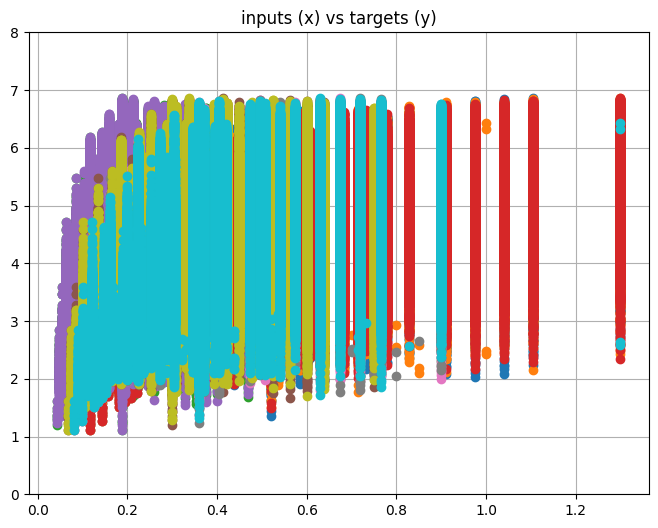

In [64]:
plt.plot(x, y, 'o')
plt.ylim([0,8])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.gcf().set_size_inches((8,6))
plt.show()

Debido a que los elementos de *x* son listas, se obtuvo el comportamiento extraño que se observa en la gráfica, entonces se toma la media para cada lista aprovechando que el elemento_i de *y* en realidad es la suma de la lista_i que contiene a *x* y la media consiste en dividir dicha suma entre el número de elementos de la lista_i. Adicionalmente, se ordenan los elementos de *x* y los elementos de *y*.

In [65]:
y_sort = np.array(sorted(y))
x_sort = np.array([round(np.mean(x_i),7) for x_i in x])
x_sort.sort()

Teniendo los valores de *x* y *y* definidos correctamente se aplica el método del descenso de gradiente a la regresión lineal para encontrar la función objetivo. Primeramente se definen algunas funciones necesarias

In [66]:
def plot(x,y,y_):
    ''' Gráfica de la función objetivo '''
    plt.plot(x,y,'o', label='real')
    plt.plot(x,y_, label='prediccion')
    plt.legend()
    plt.show()

def MSE(y,y_):
    ''' Cálculo del error cuadrático medio '''
    return np.sum((y - y_)**2)/n

def gradientes(x,y,y_):
    ''' Derivadas parciales respecto a w0 y w1 '''
    D_w0 = -2*np.sum((y-y_))/n
    D_w1 = -2*np.sum(x*(y-y_))/n
    return D_w1, D_w0

def desc_grad(x,y,w0,w1,alpha,steps,tol):
    ''' Implementación del descnso de gradiente sobre la regresión lineal '''
    for _ in range(steps):
        y_ = w0 + w1*x
        mse = MSE(y,y_)
        D_w1, D_w0 = gradientes(x,y,y_)
        w0 = w0 - D_w0*alpha
        w1 = w1 - D_w1*alpha
        if mse < tol: break
    return mse, w0, w1, y_

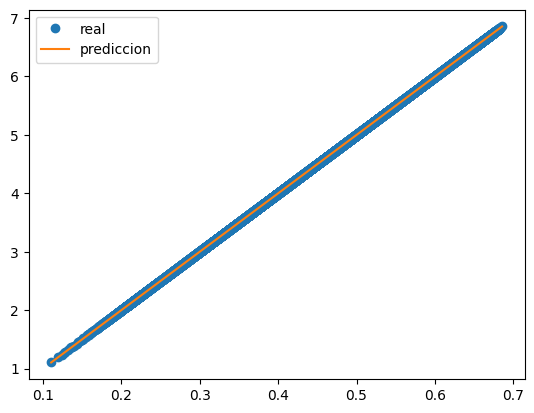

mse = 9.997651991074725e-16
w0 = 1.3114977716951519e-07
w1 = 9.999999700563023
La función objetivo es y=0.00+10.00x


In [67]:
n = len(y_sort)
w0 = random.random()
w1 = random.random()
mse, w0, w1, y_ = desc_grad(x_sort, y_sort, w0, w1, alpha=0.01, steps=200000, tol=1e-15)
plot(x_sort,y_sort,y_)
print(f'''mse = {mse}
w0 = {w0}
w1 = {w1}''')
print(f'La función objetivo es y={w0:.2f}+{w1:.2f}x')


Se obtuvo que la función objetivo es $y = 1.3⋅10^{-07} + 9.9 ⋅ x$

---

**Diseña un algoritmo para resolver el problema por fuerza bruta**

*Respuesta*

Entendiendo las restricciones ya mencionadas, para resolver el problema se toma como referencia la lista de horarios <p><center>horario_dias = ['V20', 'L20', 'S12', 'S16', 'S18', 'S20', 'D12', 'D16', 'D18', 'D20']</center></p>
Así, para diseñar el algoritmo de resolución por fuerza bruta se parte con una solución que consiste en la lista cuyos primer y segundo elementos son 'V20' y 'L20', respectivamente, debido a la restricción que indica que dichos horarios deben estar presentes 1 vez; a partir de allí, se toma el primer elemento siguiente de horario_dias ('S12') para el resto de la lista, quedando así: <p><center>horarios = ['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12']</center></p>

Ahora, el último elemento de la lista *horarios* se cambia en cada iteración por el elemento siguiente de *horario_dias*, entonces las primeras soluciones encontradas serían:

['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12']<br>
['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S16']<br>
['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S18']<br>
['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S20']<br>
['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'D12']<br>
['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'D16']<br>
['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'D18']<br>
['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'D20']<br>

Luego de haber pasado por todos los elementos de *horario_dias*, el penúltimo elemento de la lista *horarios* cambia por el elemento que le sigue en *horario_dias*, así: ['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S16', 'S12'] y repite el paso anterior, realizándolo a lo largo de toda la lista *horarios* hasta obtener la solución ['V20', 'L20', 'D20', 'D20', 'D20', 'D20', 'D20', 'D20', 'D20', 'D20'], momento en que 'L20' se mueve al siguiente índice y se repiten los pasos anteriores. Cuando dicho elemento se posicione en el último índice, 'V20' se mueve al índice siguiente a su posición actual y nuevamente repite los pasos anteriores hasta haber recorrido toda la lista.

Se aclara que en cada movimiento de los horarios 'V20' y 'L20' el algoritmo crea una lista con los índices "libres" para respetar la posición de estos elementos. Adicionalmente, con cada solución encontrada se comprueba si es mayor o igual a la mejor solución, si es así, entonces se convertirá en la mejor; dicha comprobación se realiza con otra función que acompaña al algoritmo que mejora a este. El algoritmo por fuerza bruta es el siguiente.

In [ ]:
def liga_fuerza_bruta(categorias):
    # Inicializa la mejor solución y el mejor total
    mejor_solucion = []
    mejor_total = 0
    # Toma una solución de referencia con todos los horarios disponibles
    horario_dias = ['V20','L20','S12','S16','S18','S20','D12','D16','D18','D20']
    # La solución guardada inicia siendo una copia de la solución de referencia
    horarios = horario_dias.copy()
    n = len(horario_dias)

    # Ubica los horarios 'V20' y 'L20' a partir de una lista de índices disponibles
    for i in range(n):
        indices_seleccion = list(range(n))
        horarios[i] = horario_dias[0]
        indices_seleccion.remove(i)
        for j in indices_seleccion:
            nuevo_indices = indices_seleccion.copy()
            horarios[j] = horario_dias[1]
            nuevo_indices.remove(j)
            my_vars = [2 for _ in range(n-2)]
            # Con la lista de índices resultante se ubican los horarios restantes
            # acorde a la descripción dada para el algortimo
            while my_vars[0] < n:
                for k,indice in enumerate(nuevo_indices):
                    horarios[indice] = horario_dias[my_vars[k]]
                my_vars[-1] += 1
                if my_vars[-1] == n:
                    my_vars[-1] = 2
                    my_vars[-2] += 1
                if my_vars[-2] == n:
                    my_vars[-2] = 2
                    my_vars[-3] += 1
                if my_vars[-3] == n:
                    my_vars[-3] = 2
                    my_vars[-4] += 1
                if my_vars[-4] == n:
                    my_vars[-4] = 2
                    my_vars[-5] += 1
                if my_vars[-5] == n:
                    my_vars[-5] = 2
                    my_vars[-6] += 1
                if my_vars[-6] == n:
                    my_vars[-6] = 2
                    my_vars[-7] += 1
                if my_vars[-7] == n:
                    my_vars[-7] = 2
                    my_vars[-8] += 1
                # Evalúa si la audiencia total es mayor al mejor total
                _, total_actual = totales_posibles(horarios,categorias)
                if total_actual >= mejor_total:
                    mejor_total = total_actual
                    mejor_solucion = horarios

    print('La mejor solución es', mejor_solucion)
    return mejor_total

**Calcula la complejidad del algoritmo por fuerza bruta**

*Respuesta*

El algoritmo anterior es una modificación de la siguiente función, que fue el punto de partida para el algoritmo resultante.

```
def liga_fuerza_bruta():
    horario_dias = ['V20','L20','S12','S16','S18','S20','D12','D16','D18','D20']
    candidatos_solucion = []
    n = len(horario_dias)
    horarios = horario_dias.copy()
    for i in range(n):
        horarios[i] = horario_dias[0]
        for j in range(n):
            if j == i: continue
            horarios[j] = horario_dias[1]
            for hora1 in horario_dias[2:]:
                k = 0
                while k == i or k == j: k += 1
                horarios[k] = hora1
                h1_i = k
                k += 1
                for hora2 in horario_dias[2:]:
                    k = 0
                    while k == i or k == j or k == h1_i: k += 1
                    horarios[k] = hora2
                    h2_i = k
                    k += 1
                    for hora3 in horario_dias[2:]:
                        k = 0
                        while k == i or k == j or k == h2_i: k += 1
                        horarios[k] = hora3
                        h3_i = k
                        k += 1
                        for hora4 in horario_dias[2:]:
                            k = 0
                            while k == i or k == j or k == h3_i: k += 1
                            horarios[k] = hora4
                            h4_i = k
                            k += 1
                            for hora5 in horario_dias[2:]:
                                k = 0
                                while k == i or k == j or k == h4_i: k += 1
                                horarios[k] = hora5
                                h5_i = k
                                k += 1
                                for hora6 in horario_dias[2:]:
                                    k = 0
                                    while k == i or k == j or k == h5_i: k += 1
                                    horarios[k] = hora6
                                    h6_i = k
                                    k += 1
                                    for hora7 in horario_dias[2:]:
                                        k = 0
                                        while k == i or k == j or k == h6_i: k += 1
                                        horarios[k] = hora7
                                        k += 1
                                        for hora8 in horario_dias[2:]:
                                            while k == i or k == j: k += 1
                                            horarios[k] = hora8
                                            candidatos_solucion.append(horarios.copy())
```

A pesar de ser una modificación, ambos siguen la misma lógica descrita, con lo cual, para el cálculo de la complejidad del algoritmo por fuerza bruta se toma como referencia esta función. Entonces, el número de operaciones es $n(n-1)[(n-2)^{n-2}]$, donde $n$ es la longitud que tomaría una lista que es solución, con lo cual, para una aproximación de $n$ a infinito, la complejidad será $$O(n^{n})$$

___

**Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta**

*Respuesta*

El algoritmo que mejora la coplejidad del algoritmo por fuerza bruta consiste en una función *solve_liga* basada en el algoritmo de búsqueda local, cuyo algoritmo es el siguiente:

**Búsqueda Local**
```
genera(solucion_inicial)
solucion_actual = solucion_inicial
mejor_solucion = solucion_actual
while True:
    solucion_vecina = genera_vecino(solucion_actual)
    if acepta(solucion_vecina):
        solucion_actual = solucion_vecina
    if objetivo(solucino_actual) > objetivo(mejor_solucion):
        mejor_solucion = solucion_actual
    if (criterio parada): break
```

 La función diseñada toma una mejor solución como una lista vacía, asociada a un mejor total igual a 0; luego, en una cantidad *n* de iteraciones máximas, realiza lo siguiente:
 1. Crear una solución aleatoria.
 2. Evalúa si la audiencia total para esa solución es mayor o igual al mejor total.
 3. Si es así, entonces este se convierte en el mejor total y su respectiva solución en la mejor solución.
 4. Con la solución actual se crea vecinos intercambiando parejas entre elementos que sean diferentes.
 5. Repite pasos 2 y 3.

Nota: Para algunas soluciones su audiencia total resultan iguales al aproximar una de ellas, por ejemplo,

- solucion: ['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S16']
  - total: 2.34034
- solucion: ['V20', 'L20', 'S12', 'S12', 'S12', 'S12', 'S12', 'S16', 'S12', 'S12']
  - total: 2.3403400000000003 aproximadamente igual a 2.34034

Además, el mayor número de decimales en la audiencia total que puede tener una solución es seis, como la siguiente:
- solucion: ['V20', 'L20', 'S16', 'S12', 'S12', 'S12', 'S12', 'S12', 'S12', 'S16']
  - total: 2.456375

Entonces, para el cálculo de la audiencia total se utilizará la función `round()` a 6 decimales.

In [88]:
def crear_solucion():
    '''Crea una solución aleatoria entre los horarios disponibles para el conjunto de partidos
       y la guarda en una lista'''

    # Solución de referencia que posee todos los horarios disponibles para los partidos
    horario_dias = ['V20','L20','S12','S16','S18','S20','D12','D16','D18','D20']
    # La solución retornada inicia siendo una copia de la solución de referencia
    horarios = horario_dias.copy()
    indices_seleccion = list(range(len(horarios))) # Lista con los índices disponibles para la lista horarios
    # Se ubican aleatoriamente 'V20' y 'L20' y se remueven ambos índices
    for i in range(2):
        indice = random.choice(indices_seleccion)
        horarios[indice] = horario_dias[i]
        indices_seleccion.remove(indice)
    # Se toman aleatoriamente los demás elementos de horario_dias y se van ubicando en los índices restantes
    for i_seleccion in indices_seleccion:
        horario = random.choice(horario_dias[2:])
        horarios[i_seleccion] = horario
    return horarios

def totales_posibles(solucion,categorias):
    '''Crea una lista con la audiencia total para cada horario de la solución aleatoria creada.
       Toma la lista de categorías del problema y la solución generada'''

    # Crea una lista con la audiencia base para cada categoría
    categoria_audiencia = {'A_A':2,'B_A':1.3,'C_A':1,'B_B':0.9,'C_B':0.75,'C_C':0.47}
    audiencia_base = []
    for categoria in categorias:
        audiencia_base.append(categoria_audiencia[categoria])
    # Factor de audiencia para cada horario disponible
    ponderacion = {'V20':0.4, 'L20':0.4, 'S12':0.55, 'S16':0.7, 'S18':0.8, 'S20':1, 'D12':0.45, 'D16':0.75, 'D18':0.85, 'D20':1}
    # Porcentaje restado por cada coincidencia entre horarios
    coincidencias = [0, 0.25, 0.45, 0.60, 0.70, 0.75, 0.78, 0.80]
    totales = []
    # Por cada horario presente en la solución se calcula su audiencia acorde a los factores correspondientes
    # y se añade a la lista de totales
    for i,hora_i in enumerate(solucion):
        coincidencia = solucion.count(hora_i) - 1
        audiencia = audiencia_base[i] * ponderacion[hora_i] * (1 - coincidencias[coincidencia])
        totales.append(round(audiencia,6))
    # Cálculo de la audiencia total para la lista totales
    total_audiencia = audiencia_total(totales)
    return totales, total_audiencia

def audiencia_total(totales):
  '''Calcula la suma total de audiencia para una solución encontrada.
     Toma la lista de audiencias totales correspondientes a los horarios de la solución'''
  return round(sum(totales),6)


def solve_liga(categorias,n):
    '''Encuentra una aproximación a la solución óptima para el problema de la máxima
       audiencia en un conjunto de partidos definido.
       Toma la lista de categorías del problema y un número n de iteraciones'''

    # Inicialización de la mejor solución y mejor total
    mejor_solucion = []
    mejor_total = 0
    for _ in range(n):
        # Crea una solución inicial y guarda su audiencia total
        solucion_actual = crear_solucion()
        _, total_actual = totales_posibles(solucion_actual,categorias)
        # Si la audiencia total es mayor o igual al mejor total, se guardan como el mejor total
        # y la mejor solución
        if total_actual >= mejor_total:
            mejor_solucion = solucion_actual
            mejor_total = total_actual
        # Para cada elemento de la lista solución
        # realiza pares de intercambios con los elementos restantes siguientes
        for i,e_i in enumerate(solucion_actual[:-1]):
            intercambios = [e_i]
            indices = []
            for j,e_j in enumerate(solucion_actual[i+1:]):
                if e_j not in intercambios:
                    intercambios.append(e_j)
                    indices.append(j+i+1)
            # Cada intercambio realizado es un vecino de la solución inicial
            for indice in indices:
                solucion_vecino = solucion_actual.copy()
                solucion_vecino[i], solucion_vecino[indice] = solucion_vecino[indice], solucion_vecino[i]
                _, total_vecino = totales_posibles(solucion_vecino,categorias)
                # Evalúa si la audiencia total del vecino es mayor o igual al mejor total
                if total_vecino >= mejor_total:
                    mejor_total = total_vecino
                    mejor_solucion = solucion_vecino

    print('La mejor solución es', mejor_solucion)
    return mejor_total

Esta función mejora el algoritmo por fuerza bruta gracias a que tiene una complejidad computacional menor (se abordará en la siguiente pregunta) teniendo un tiempo de ejeción significativamente menor y proporcional al valor que se introduzca para el número de iteaciones. Se trató de ejecutar el algoritmo por fuerza bruta, pero luego de 4 horas no logró finalizar y se decidió detener la ejecución. A continuación se ilustra el tiempo de ejecución para la presente función.

In [70]:
categorias = ['B_A','B_A','C_C','B_A','C_C','B_C','B_B','B_B','B_C','B_B']
for _ in range(10):
    inicio = time.time()
    print('Mejor total:',solve_liga(categorias,10000))
    fin = time.time()
    print('Tiempo de ejecución:',fin-inicio)
    print()

La mejor solución es ['S20', 'D20', 'V20', 'D18', 'L20', 'D16', 'S12', 'S16', 'D16', 'S18']
Mejor total: 6.76975
Tiempo de ejecución: 6.244424819946289

La mejor solución es ['D20', 'S20', 'L20', 'D18', 'D12', 'S12', 'S16', 'S18', 'D16', 'V20']
Mejor total: 6.7895
Tiempo de ejecución: 6.051505088806152

La mejor solución es ['S20', 'D18', 'L20', 'D20', 'D12', 'V20', 'S16', 'S18', 'S12', 'D16']
Mejor total: 6.842
Tiempo de ejecución: 5.522828578948975

La mejor solución es ['S20', 'D18', 'D12', 'D20', 'V20', 'S18', 'S12', 'S16', 'L20', 'D16']
Mejor total: 6.8045
Tiempo de ejecución: 6.637690544128418

La mejor solución es ['D20', 'S16', 'L20', 'D18', 'V20', 'S12', 'D16', 'S18', 'D12', 'S20']
Mejor total: 6.736
Tiempo de ejecución: 5.3682701587677

La mejor solución es ['D18', 'D20', 'V20', 'S20', 'L20', 'D12', 'D16', 'S12', 'S16', 'S18']
Mejor total: 6.8335
Tiempo de ejecución: 6.731936931610107

La mejor solución es ['S20', 'D20', 'S12', 'D16', 'V20', 'L20', 'S18', 'S16', 'D12', 'D18']

Entre los resultados retornados por la función, el total de audiencia máximo encontrado es 6.842 millones de aficionados. Aprovechando la ejecución anterior y que el último elemento de la lista `y_sort` corresponde con la máxima audiencia total encontrada, la siguiente tabla muestra la distribución de horarios que mejor se adapta al objetivo del problema y se comparará con mejor resultado obtenido por la función.

In [83]:
for i in range(len(y)):
  _, total = totales_posibles(soluciones[i],categorias)
  if total == y_sort[-1]: break
horario = soluciones[i]
audiencia = x[i]
partidos_liga = {'Equipos':['Celta - Real Madrid','Valencia - R. Sociedad','Mallorca - Eibar','Athletic - Barcelona', 'Leganés - Osasuna','Villareal - Granada','Alavés - Levante', 'Espanyol - Sevilla','Betis - Valladolid','Atlético - Getafe'],
                 'Categorias':['B_A','B_A','C_C','B_A','C_C','B_C','B_B','B_B','B_C','B_B'],
                 'Horario':horario,
                 'Audiencia':audiencia}
print('La máxima audiencia total que se puede lograr es', round(np.sum(audiencia),6),'millones de personas')
print()
pd.DataFrame(partidos_liga)

La máxima audiencia total que se puede lograr es 6.856 millones de personas



,Equipos,Categorias,Horario,Audiencia
0,Celta - Real Madrid,B_A,D18,1.1050
1,Valencia - R. Sociedad,B_A,S20,1.3000
2,Mallorca - Eibar,C_C,L20,0.1880
3,Athletic - Barcelona,B_A,D20,1.3000
4,Leganés - Osasuna,C_C,V20,0.1880
5,Villareal - Granada,B_C,S12,0.4125
6,Alavés - Levante,B_B,D16,0.6750
7,Espanyol - Sevilla,B_B,S18,0.7200
8,Betis - Valladolid,B_C,D12,0.3375
9,Atlético - Getafe,B_B,S16,0.6300


En las 10 ejecuciones realizadas se obtuvo una buena aproximación a la solución óptima, aunque es posible obtener una aproximación exacta a la misma, ya que las listas utilizadas para el cálculo de la función objetivo emplearon el algoritmo en cuestión.

___

**Calcula la complejidad del algoritmo**

*Respuesta*

La función en cuestión ejecuta su algoritmo una cantidad k de iteraciones que se pasen como argumento; dicho algoritmo emplea un `for()` de rango igual a la longitud n que tenga la solución encontrada -1, dentro del cual se ejecuta otro `for()` con rango <= el rango anterior -1. Las funciones "auxiliares" tienen una complejidad menor, así que son despreciables.

En este orden de ideas y para un valor de n próximo a infinito, si tomamos en cuenta la constante multiplicativa, la complejidad computacional del algoritmo es $$O(k⋅n^2)$$

___

**Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios**<br>
**Aplica el algoritmo al juego de datos generado**

*Respuesta*

Se tiene en cuenta que son 3 equipos en la categoría A, 11 equipos en la categoría B y 6 equipos en la categoría C

In [90]:
categorias_equipos = ['A','A','A','B','B','B','B','B','B','B','B','B','B','B','C','C','C','C','C','C']
categorias = []
for _ in range(10):
    equipo1 = random.choice(categorias_equipos)
    categorias_equipos.remove(equipo1)
    equipo2 = random.choice(categorias_equipos)
    categorias_equipos.remove(equipo2)
    if equipo1 >= equipo2:
        categorias.append(str(equipo1)+'_'+str(equipo2))
    else:
        categorias.append(str(equipo2)+'_'+str(equipo1))

print('Para la categoría',categorias)
print('Maxima audiencia total:',solve_liga(categorias,10000))

Para la categoría ['C_B', 'C_B', 'B_B', 'C_B', 'C_B', 'B_A', 'B_A', 'B_A', 'C_B', 'C_B']
La mejor solución es ['D16', 'S12', 'S18', 'L20', 'S16', 'D18', 'S20', 'D20', 'V20', 'D12']
Maxima audiencia total: 6.8625


**Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño**

*Respuesta*

En la solución del problema con las categorías dadas y con un conjuntpo de categorías aleatorio se observa un comportamiento en común, la máxima audiencia total se logra evitando la repetición entre los diferentes horarios, esto es debido al factor que disminuye la audiencia en casos donde se presentan coincidencias. Este resultado puede considerarse en problemas de la misma naturaleza al momento de buscar una solución óptima, inclusive si se busca un mínimo, cuya solución es a partir del máximo número de coincidencias posibles con el horario que tenga menor factor de audiencia.